# Question 2 - Analysis 2

#### Combine the 2 datasets *(archives and article search)* as both have same data structure and eliminate dupllicate articles
#### Find dates for each article and find trending keywords and 2 NNPs present adjusent to each other in lead paragraph on those dates.
#### Use nltk pos taging to get two NNPs used adjusent to each other in lead paragraph and consider them as trending keywords
#### Find all such trending keywords in this month
#### Sort them in descending order and plot top 25

In [2]:
import json, os, glob, matplotlib.pyplot as plt, nltk, operator
from datetime import datetime

In [3]:
current_dir = os.path.dirname('__file__')
data_dir = os.path.join(current_dir, '..', 'data','question2','*','*.json')

In [4]:
already_present_file = []
for filename in glob.glob(data_dir):
    with open(filename) as fil:
        current_file = json.load(fil)
        this_response = [artic for artic in current_file if artic['_id'] not in [articles['_id'] for articles in already_present_file]]
        already_present_file.extend(this_response)

In [5]:
dict_for_articles_covered = {}
count = 0
analyzed_data = []
for article in already_present_file:
    datetime_object = datetime.strptime(article['pub_date'][:10], '%Y-%m-%d')
    this_month = datetime.today().month - 1
    if datetime_object.month < this_month:
        break
    
    try:
        keywords_in_this_article = [trend_keyword['value'] for trend_keyword in article['keywords']]
        analyzed_data.extend(keywords_in_this_article)
    except:
        analyzed_data
    
    statement = article['lead_paragraph']
    if statement != None:
        list_of_words = nltk.word_tokenize(statement)
        tokens = nltk.bigrams(list_of_words)
        for token in tokens:
            text=[]
            for word in token:
                text.append(word)
            tags = nltk.pos_tag(text)
            if tags[0][1]=='NNP' or tags[0][1]=='NNPS' and tags[1][1]=='NNP' or tags[1][1]=='NNPS':
                analyzed_data.append(tags[0][0]+' '+tags[1][0])    

In [6]:
item_list = {}
for item in analyzed_data:
    if item in item_list:
        item_list[item] +=1
    else:
        item_list[item] =1

#Sort the dictionary according to values
sorted_items_dict = sorted(item_list.items(), key=operator.itemgetter(1), reverse=True)

#Sort the words with same frequency alphabetically
sorted_items = sorted(sorted_items_dict, key=lambda val: (-val[1], val[0]))

In [7]:
def write_to_json_file(file_path, json_data):
    with open(file_path, 'w') as json_out:
        json.dump(json_data, json_out, indent=2)

def create_directory_for_output():
    current_dir = os.path.dirname('__file__')
    data_folder = os.path.join(current_dir, 'ana_2')
    if not os.path.exists(data_folder):
        os.mkdir(data_folder)
    return data_folder

output_folder=create_directory_for_output()

file_name = 'tending_topics_this_and_last_month'
file_path = os.path.join(output_folder, file_name)
file_path+='.json'

write_to_json_file(file_path, sorted_items)
# print(sorted_items[:50])

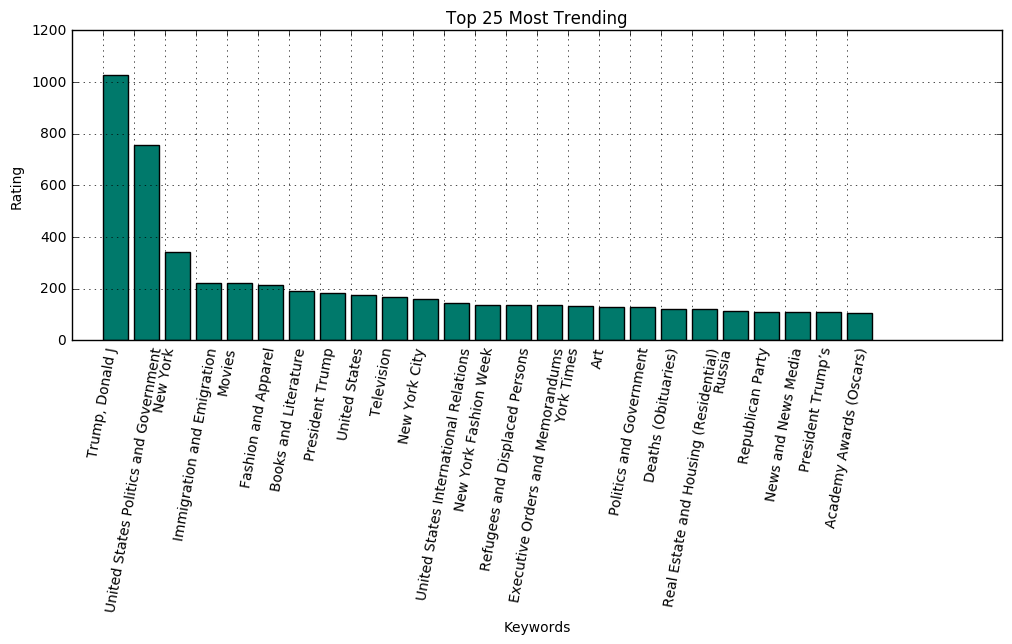

In [8]:
# x and y axes and dates for lables
x_val = []
y_val = []
words = []
count = 0
for item in sorted_items[:25]:
#     print(item[0])
    words.append(item[0])
    count+=1
    x_val.append(count)
#     print(item[1])
    y_val.append(item[1])

fig = plt.figure()                                                           #Width of each bar
plt.bar(x_val[:25], y_val[:25], color='#00796B')                             #Graph type with values for both axes
plt.grid(True)                                                               #Show grid
plt.xticks(x_val[:25], words[:25],  rotation=80)
plt.ylabel('Rating')
plt.xlabel('Keywords')
plt.title('Top 25 Most Trending')  
fig.set_figwidth(12, 10)                                                     #Graph width
plt.show()                                                                   ##Show graph